In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import *
from sklearn.metrics import mean_squared_error

filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [3]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
df.replace("?", np.nan, inplace=True)
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [4]:
df[["age"]] = df[["age"]].astype("float64")
df[["smoker"]] = df[["smoker"]].astype("float64")

df[["age"]] = df[["age"]].fillna(df[["age"]].mean())

mode_for_smoker = df[["smoker"]].value_counts().idxmax()
df[["smoker"]] = df[["smoker"]].fillna(mode_for_smoker[0])

df[["charges"]] = round(df[["charges"]], 2)

df.head()


,age,gender,bmi,no_of_children,smoker,region,charges
0,19.0,1,27.900,0,1.0,3,16884.92
1,18.0,2,33.770,1,0.0,4,1725.55
2,28.0,2,33.000,3,0.0,4,4449.46
3,33.0,2,22.705,0,0.0,1,21984.47
4,32.0,2,28.880,0,0.0,1,3866.86


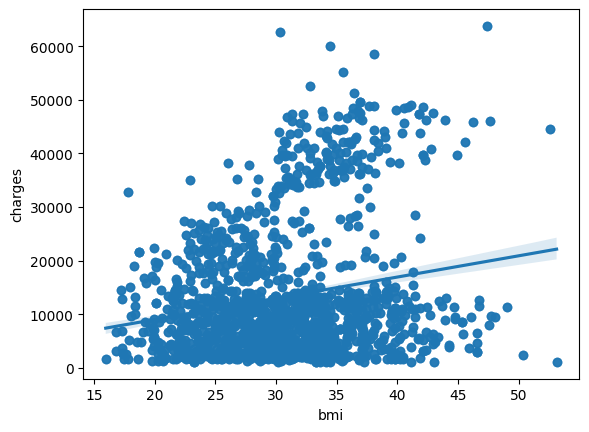

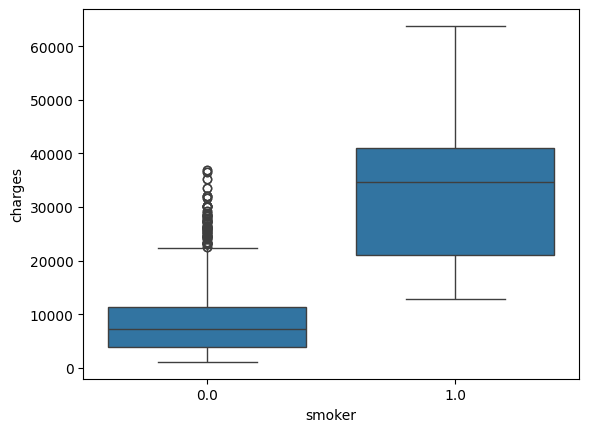

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026041,0.113045,0.037585,-0.023285,-0.007175,0.298622
gender,-0.026041,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113045,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037585,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023285,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007175,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298622,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [5]:
sns.regplot(x = "bmi", y = "charges", data = df)
plt.show()
sns.boxplot(data = df, x = "smoker", y = "charges")
plt.show()
df.corr()

In [6]:
lm = LinearRegression()
y = df[["charges"]]
X = df.drop("charges", axis=1)
lm.fit(X, y)
score = lm.score(X, y)
score

0.7504063772187107

In [7]:
Input = [("scale", StandardScaler()), ("poly", PolynomialFeatures(degree=2)), ("model", LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X=X, y=y)
R2 = pipe.score(X, y)
R2

0.8452558518297514

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
alpha = 0.1
poly = PolynomialFeatures(degree=2)
x_train_poly, x_test_poly = poly.fit_transform(x_train), poly.fit_transform(x_test)
Ridge_model = Ridge(alpha=0.1)
Ridge_model.fit(x_train_poly, y_train)
Yhat = Ridge_model.predict(x_test_poly)
sore = Ridge_model.score(x_test_poly, y_test)
sore

0.7835630578755349